## Weekend Movie Trip

### Data Clustering - Project 3

Submitted by:
Mugdha Bajjuri

#### Blockbuster or art film?

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files 'links.csv', 'movies.csv', 'ratings.csv' and 'tags.csv'. More details about the contents and use of all these files follows.

In [1]:
# Reading links.csv
import pandas as pd
df_ids = pd.read_csv('../data/raw/links.csv')
df_ids.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [2]:
# Reading movies.csv
df_movies = pd.read_csv('../data/raw/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
#splitting the genres into a list of genres each movie has
df_movies['genre_list'] = df_movies['genres'].str.split('|').values

In [4]:
df_movies.head()

,movieId,title,genres,genre_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [5]:
#finding unique genres in the entire dataset
genre_labels = set()
for s in df_movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [6]:
#Splitting the 'title' column to find the year of the movie
new = df_movies["title"].str.rsplit("(", n = 1, expand = True) 
df_movies["Movie_Title"]= new[0] 
df_movies["year"]= new[1] 
df_movies["year"] = df_movies["year"].astype(str)
df_movies['year'] = df_movies['year'].apply(lambda x:x.strip(')'))

#removing extra characters in the year column
df_movies['year'] = df_movies['year'].str.extract('(\d+)', expand=False)
df_movies.head()

,movieId,title,genres,genre_list,Movie_Title,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],Father of the Bride Part II,1995


In [7]:
# Reading ratings.csv
df_ratings = pd.read_csv('../data/raw/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
# Reading tags.csv
df_tags = pd.read_csv('../data/raw/tags.csv')
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
#combining the dataframes df_ratings and df_tags on the common columns

df_merge = pd.merge(df_ratings, df_tags,  how='outer', left_on=['userId','movieId','timestamp'], right_on = ['userId','movieId','timestamp'])

In [10]:
df_merge.head()
df_merge.to_csv('cluster.csv')

In [11]:
#combining all the dataframes into one

from functools import reduce
dfs = [df_ids, df_movies, df_merge]
df = reduce(lambda left,right: pd.merge(left,right,on='movieId'), dfs)

In [12]:
#sorting the year column
df4 = df.sort_values(by ='year', ascending=False)

In [13]:
# this is the final dataframe 
df.head()

,movieId,imdbId,tmdbId,title,genres,genre_list,Movie_Title,year,userId,rating,timestamp,tag
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,1,4.0,964982703,NaN
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,5,4.0,847434962,NaN
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,7,4.5,1106635946,NaN
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,15,2.5,1510577970,NaN
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,17,4.5,1305696483,NaN


In [14]:
df3 = pd.DataFrame(columns = ['unique_tags'])
df3['unique_tags'] = df['tag'].unique()
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df3.unique_tags: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

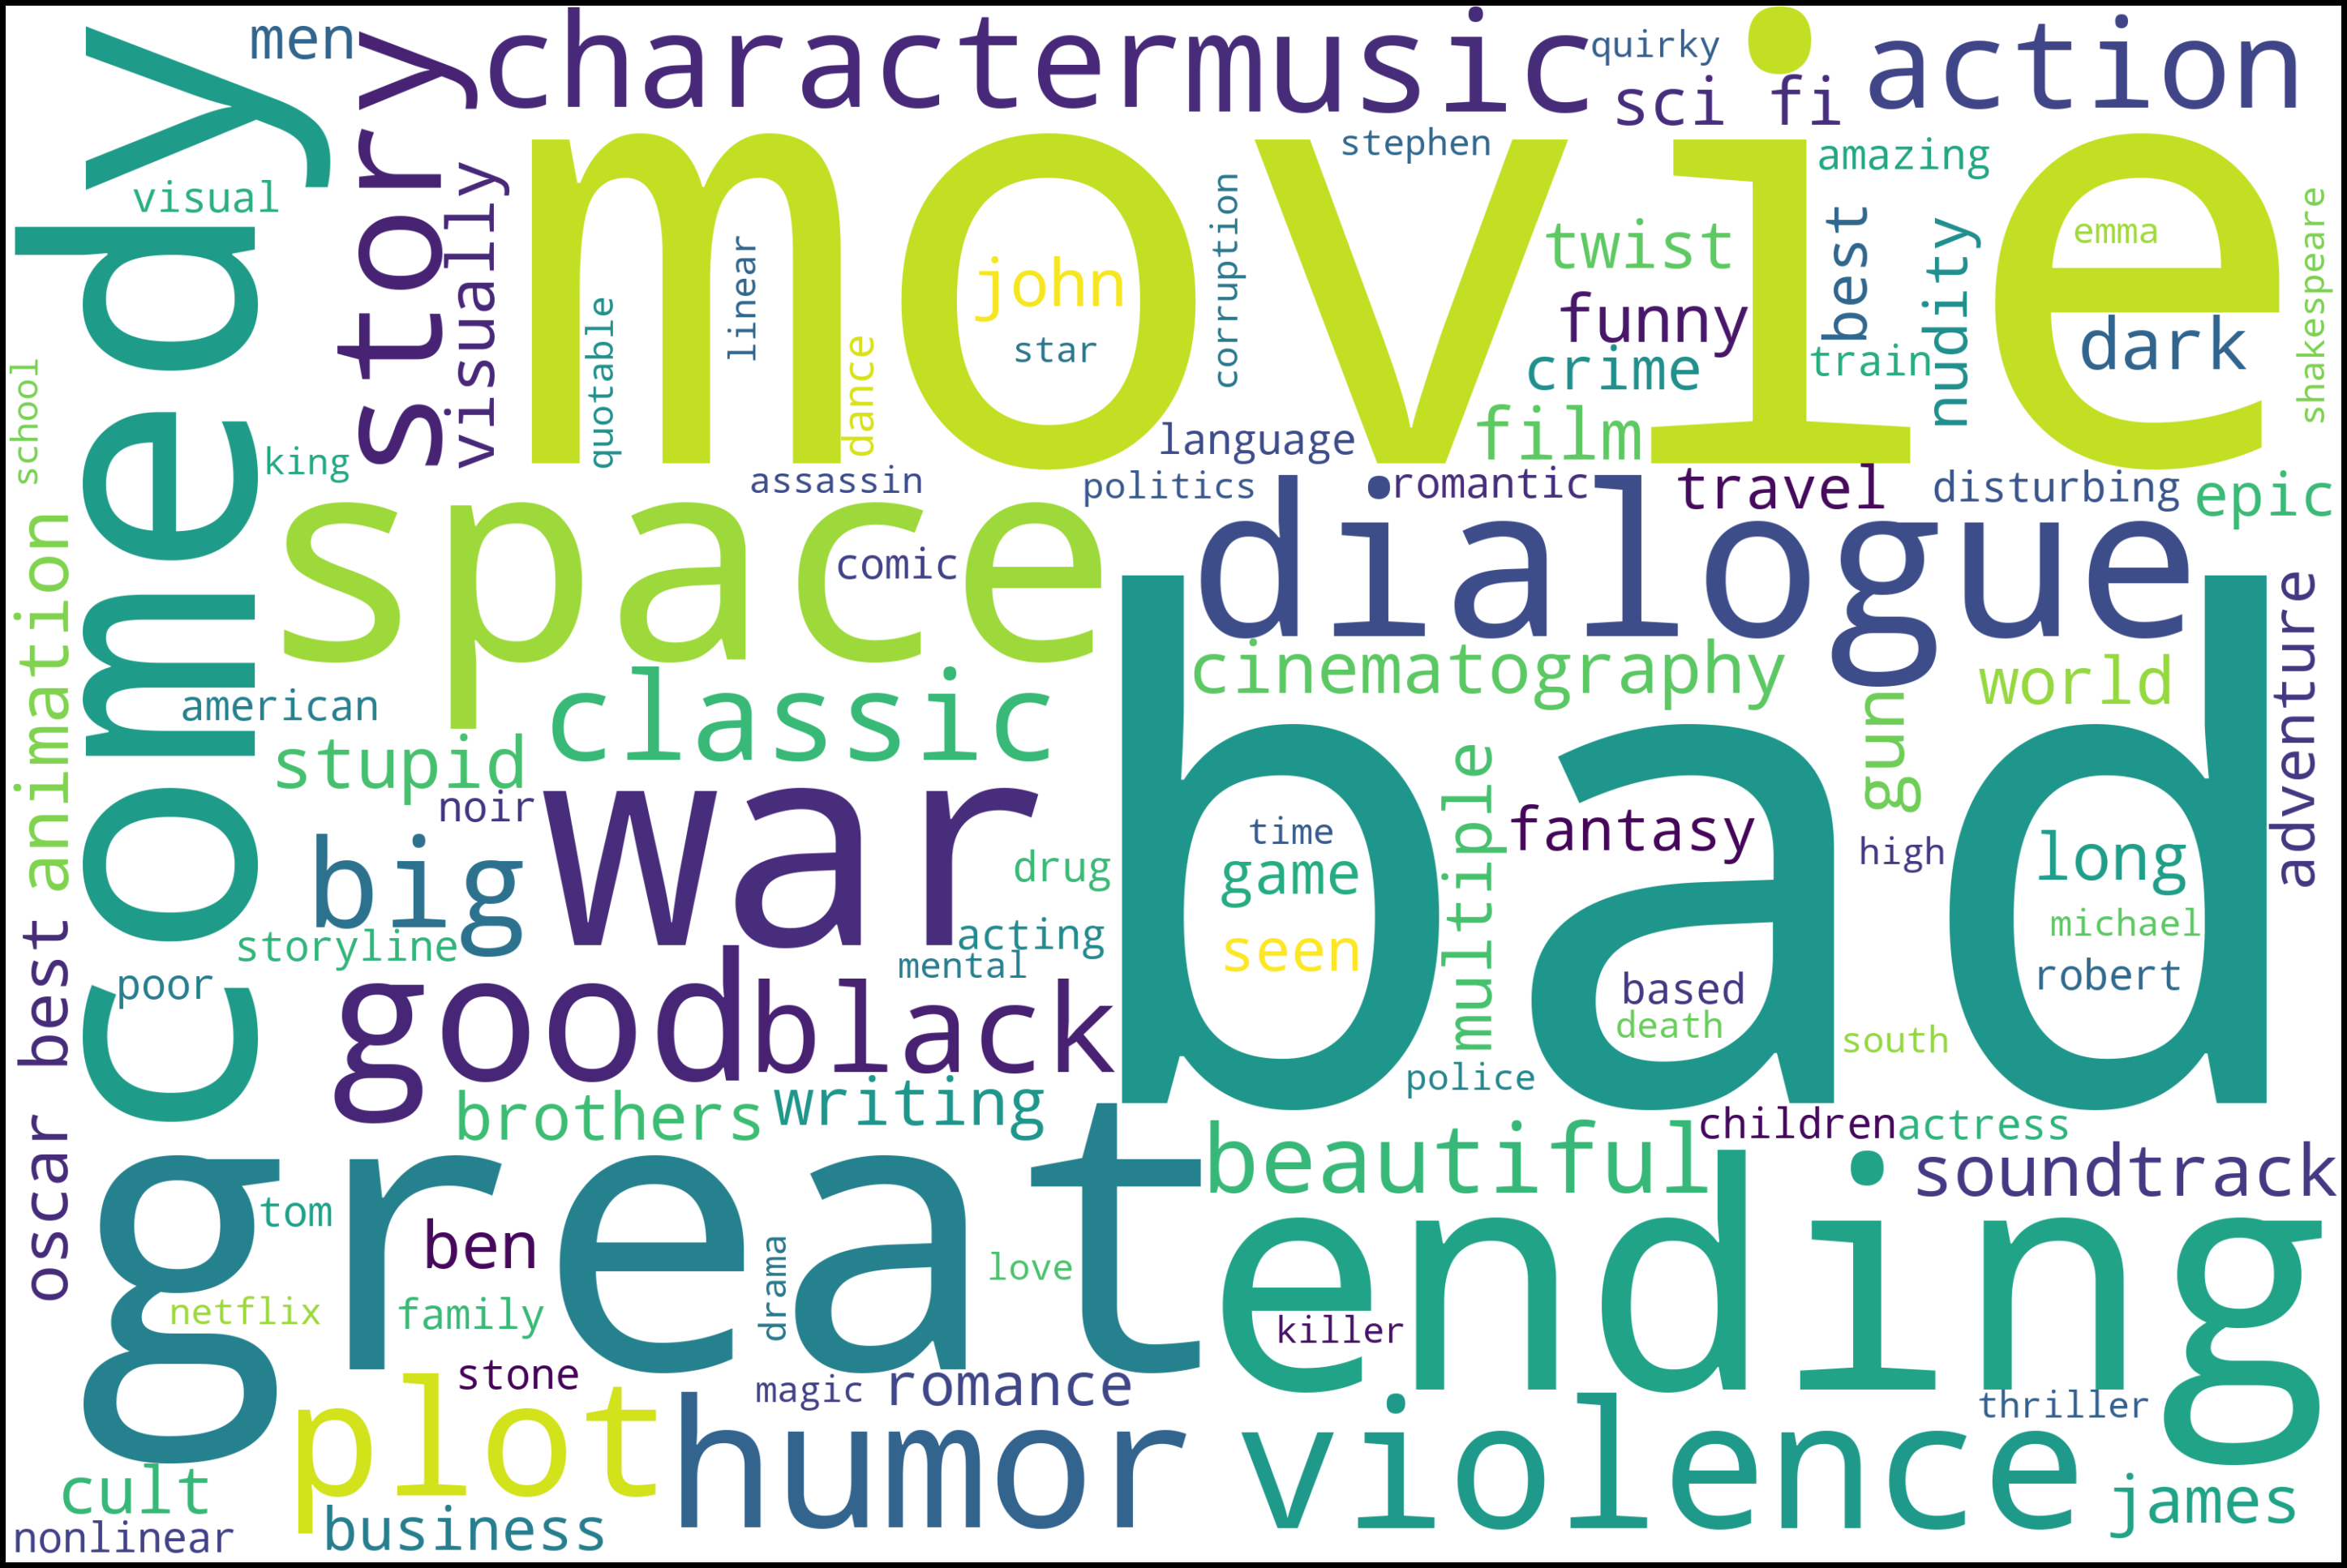

In [15]:
#Analyzing user feedback on the movies.
import matplotlib.pyplot as plt

%matplotlib inline

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    max_words=100,
    stopwords = stopwords).generate(comment_words)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [16]:
#Saving the dataframe into a csv
df.to_csv('processed.csv')
df.to_csv('processed2.csv')

In [17]:
df1 = pd.read_csv('../notebooks/processed.csv')

In [18]:
# finding average rating for each movie
df1 = df.groupby('movieId')['rating'].mean().reset_index(name='avg_rating')
df1.head()

,movieId,avg_rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429


In [19]:
#rslt_df has the movies which have average rating more than 4.0
rslt_df = df1.loc[df1['avg_rating'] >= 4.0]

In [20]:
#drop down of all the genres, when selected a genre gives list of movies of selected genre which are having rating more than 4.0

In [21]:
import dash
import dash_table
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [22]:
app = dash.Dash()
app.css.append_css({"external_url": "https://codepen.io/chriddyp/pen/bWLwgP.css"})

In [23]:
app.layout = html.Div([
   
    dcc.Dropdown(
        id = 'genres-dropdown',
        options = [
            {'label' : i, 'value': i}  for i in genre_labels
        ],
        placeholder="Select a genre",
    ),
    dcc.Dropdown(
        id = 'years-dropdown',
        options = [
            {'label' : h, 'value': h}  for h in df4.year.unique()
        ],
        placeholder="Select an year",
    ),
    html.Div(
        id='output-container',
        #className="app-header"
    )
])

@app.callback(
    dash.dependencies.Output('output-container', 'children'),
    [dash.dependencies.Input('genres-dropdown', 'value'),
    dash.dependencies.Input('years-dropdown', 'value')])
def update_output(value1, value2):
    df3 = df.loc[(df['genres'] == value1) & (df['year'] == value2)]
    return df3['title'].unique()
    #return value1
    

In [24]:
if __name__ == '__main__':
    app.run_server()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
